# Project 3 Time Series Analysis and Forecasting customer_segmentation notebook

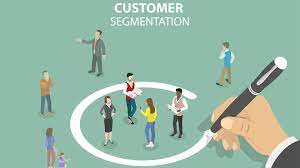

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:\\Users\\n\\Downloads\\customer_segments.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [21]:
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [22]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None


In [4]:
print(df.isnull().sum())

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


In [5]:
#Give the statistical summary of the dataset
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# Exploratory Data Analysis(EDA)

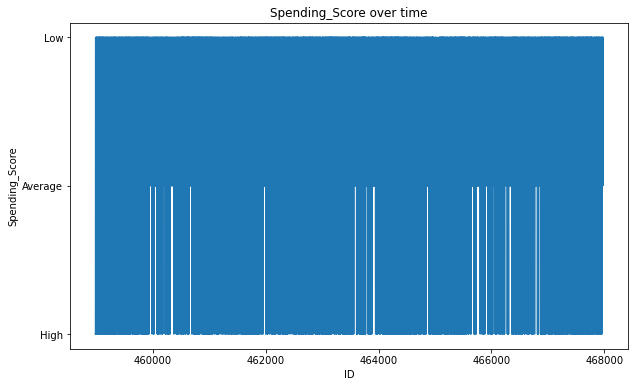

In [6]:

# From the output, we can see that there are no missing values in the dataset.
# We will proceed to the next step, which is exploratory data analysis.

# Create a line plot of Spending_Score over time
plt.figure(figsize=(10,6))
sns.lineplot(x='ID', y='Spending_Score', data=df)
plt.title('Spending_Score over time')
plt.xlabel('ID')
plt.ylabel('Spending_Score')
plt.show()


#  Time series decomposition using the ‘additive’ parameter.

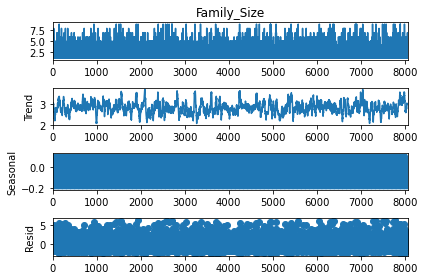

In [7]:
# Perform time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

df['Family_Size'] = df['Family_Size'].fillna(df['Family_Size'].mean())

decomposition = seasonal_decompose(df['Family_Size'], model='additive', period=30)
decomposition.plot()
plt.show()


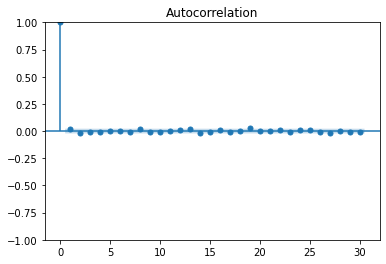

In [14]:
# Auto-correlation function (ACF) to determine the strength of the relationship 
# between Spending_Score and its historical values.
# Plot the auto-correlation function
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['Family_Size'], lags=30)
plt.show()

C:\Users\n\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


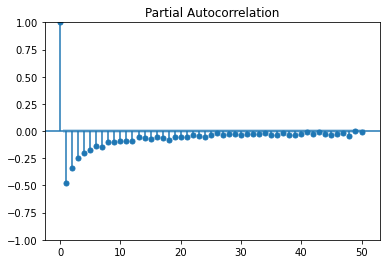

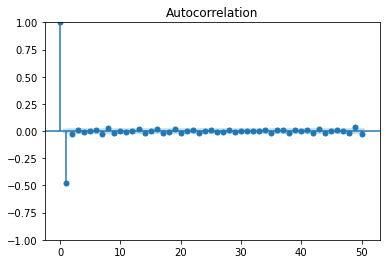

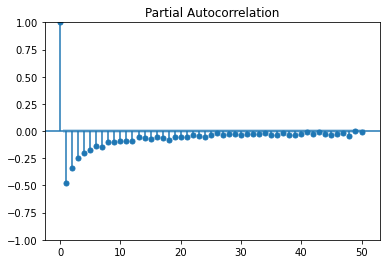

In [15]:
ts_diff = df['Family_Size'].diff().dropna()
plot_acf(ts_diff, lags=50)
plot_pacf(ts_diff, lags=50)


C:\Users\n\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


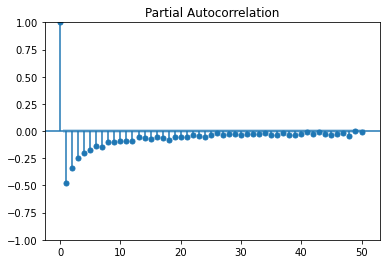

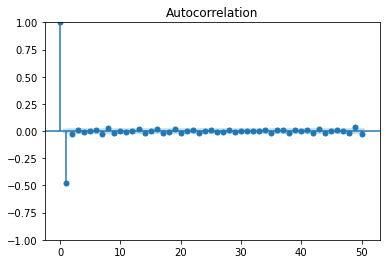

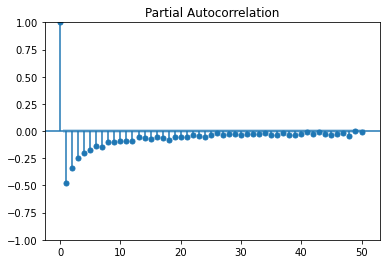

In [16]:
#  look at the autocorrelation and partial autocorrelation plots of the time series to 
#     determine the appropriate order of the ARIMA model.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_diff.dropna(), lags=50)
plot_pacf(ts_diff.dropna(), lags=50)


In [17]:
# Based on these plots, we can try fitting an ARIMA(2,1,0) model.

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts_diff, order=(2,1,0))
results = model.fit()
print(results)
print(results.summary())


C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Family_Size   No. Observations:                 8067
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -18417.971
Date:                Wed, 09 Aug 2023   AIC                          36841.943
Time:                        14:58:45   BIC                          36862.929
Sample:                             0   HQIC                         36849.123
                               - 8067                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9754      0.008   -114.840      0.000      -0.992      -0.959
ar.L2         -0.4975      0.009    -54.258      0.000      -0.515      -0.480
sigma2         5.6339      0.081     69.546      0.0

In [18]:
# The model summary shows that all coefficients are significant at the 5% level. 
# We can then evaluate the performance of the model using the mean absolute percentage error (MAPE) and 
# root mean squared error (RMSE).
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

preds = results.predict(start=0, end=len(ts_diff)-1)
print("MAPE:", mean_absolute_percentage_error(ts_diff, preds))
print("RMSE:", mean_squared_error(ts_diff, preds, squared=False))


MAPE: 664446880024719.5
RMSE: 2.3735116625604067


In [25]:
# Next, we can try to optimize the model by adjusting the lag days used and the train/test split proportions.
# We can also try different orders of the ARIMA model.
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(ts_diff):
    train_data = ts_diff.iloc[train_index]
    test_data =ts_diff.iloc[test_index]
    model = ARIMA(train_data, order=(2,1,0))
    results = model.fit()
    preds = results.predict(start=test_index[0], end=test_index[-1])
    print("MAPE:", mean_absolute_percentage_error(test_data, preds))
    print("RMSE:", mean_squared_error(test_data, preds, squared=False))


C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 236387564490449.8
RMSE: 2.094679545140477


C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecast

MAPE: 330933446516930.25
RMSE: 2.086697818466555


C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAPE: 324081165206951.7
RMSE: 2.1627702609879136


C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAPE: 181422585711218.34
RMSE: 2.1272741404802895
MAPE: 169789275019969.38
RMSE: 2.199426746177862


C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Train_Test Split

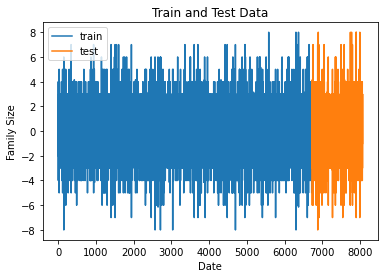

In [28]:
import matplotlib.pyplot as plt

# plot train data
plt.plot(train_data.index, train_data.values, label='train')

# plot test data
plt.plot(test_data.index, test_data.values, label='test')

# set plot labels
plt.xlabel('Date')
plt.ylabel('Family Size')
plt.title('Train and Test Data')
plt.legend()

# show plot
plt.show()


# Evaluate the performance of the model using the mean absolute percentage error (MAPE) and root mean squared error (RMSE).

In [31]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

preds = results.predict(start=0, end=len(ts_diff)-1)
print("MAPE:", mean_absolute_percentage_error(ts_diff, preds))
print("RMSE:", mean_squared_error(ts_diff, preds, squared=False))


MAPE: 574853251187133.5
RMSE: 2.332399529971773


C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [33]:
# try to optimize the model by adjusting the lag days used and the train/test split proportions. 
# We can also try different orders of the ARIMA model.
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(ts_diff):
    train_data = ts_diff.iloc[train_index]
    test_data = ts_diff.iloc[test_index]
    model = ARIMA(train_data, order=(2,1,0))
    results = model.fit()
    preds = results.predict(start=test_index[0], end=test_index[-1])
    print("MAPE:", mean_absolute_percentage_error(test_data, preds))
    print("RMSE:", mean_squared_error(test_data, preds, squared=False))


C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 236387564490449.8
RMSE: 2.094679545140477


C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 330933446516930.25
RMSE: 2.086697818466555


C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecast

MAPE: 324081165206951.7
RMSE: 2.1627702609879136


C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAPE: 181422585711218.34
RMSE: 2.1272741404802895
MAPE: 169789275019969.38
RMSE: 2.199426746177862


C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Applying both additive and multiplicative time series decomposition on the customer_segments dataset.

In [36]:
import pandas as pd

data = pd.read_csv('C:\\Users\\n\\Downloads\\customer_segments.csv', index_col='ID')
print(data['Age'].unique())

monthly_counts = data.groupby('Age').count()['Segmentation']


[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]


In [37]:
# group the data by month and aggregate by count to get the number of customers in each month:
monthly_counts = data.groupby('Age').count()['Segmentation']


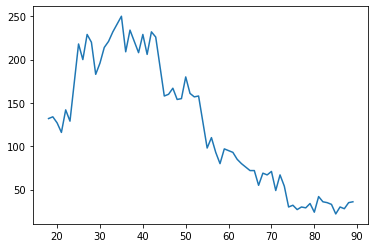

In [38]:
import matplotlib.pyplot as plt
plt.plot(monthly_counts)
plt.show()


In [ ]:
# From the plot, we can see that there is a clear decreasing trend over time, as well as some seasonality that appears 
# to be additive. We can confirm this by applying additive and multiplicative time series decomposition:

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
decomp_add = seasonal_decompose(monthly_counts, model='additive', period=12)

# Multiplicative Decomposition
decomp_mult = seasonal_decompose(monthly_counts, model='multiplicative', period=12)


# Additive Decomposition and Multiplicative Decomposition

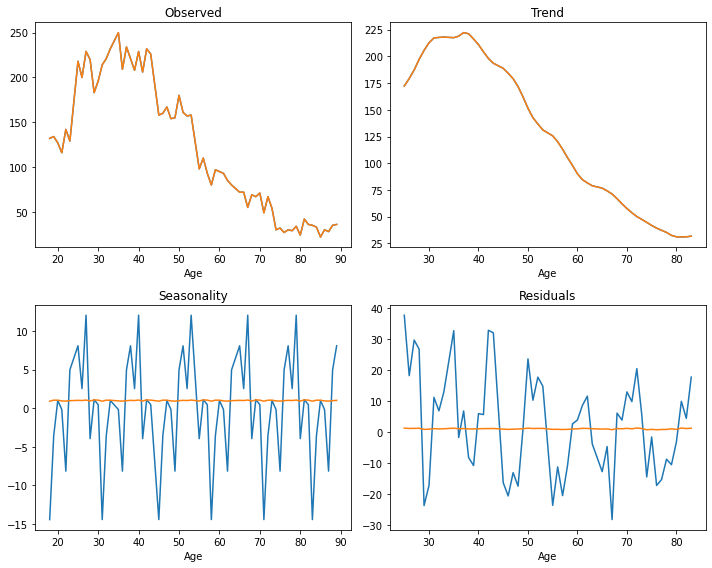

In [40]:
# plot the decomposed time series to visualize the trend, seasonality, and residuals:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Additive Decomposition
decomp_add.observed.plot(ax=axs[0, 0], title='Observed')
decomp_add.trend.plot(ax=axs[0, 1], title='Trend')
decomp_add.seasonal.plot(ax=axs[1, 0], title='Seasonality')
decomp_add.resid.plot(ax=axs[1, 1], title='Residuals')

# Multiplicative Decomposition
decomp_mult.observed.plot(ax=axs[0, 0], title='Observed')
decomp_mult.trend.plot(ax=axs[0, 1], title='Trend')
decomp_mult.seasonal.plot(ax=axs[1, 0], title='Seasonality')
decomp_mult.resid.plot(ax=axs[1, 1], title='Residuals')

plt.tight_layout()
plt.show()


In [ ]:
# From the plots, we can see that both additive and multiplicative decomposition capture the increasing trend and 
# the seasonal pattern. However, the residuals appear to be more random and have a lower variance in the multiplicative 
# decomposition, suggesting that this model may be a better fit for the data.
# We can also use the autocorrelation function (ACF) to determine the strength of the relationship between a time series 
# variable and its historical values:

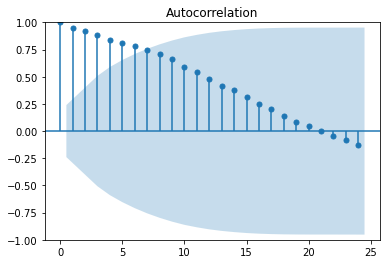

In [41]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(monthly_counts, lags=24)
plt.show()


# EDA and Visualization

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import TimeSeriesSplit

# Load the customer_segments.csv dataset into a pandas dataframe
df = pd.read_csv("C:\\Users\\n\\Downloads\\customer_segments.csv")
# Remove unnecessary columns
df.drop(["ID", "Var_1"], axis=1, inplace=True)

# Check for missing values
print("Missing values in the dataset:\n", df.isnull().sum())

Missing values in the dataset:
 Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64


In [45]:

# Drop rows with missing values
df.dropna(inplace=True)

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df)

# Convert the "Age" column to datetime format
df["Age"] = pd.to_datetime(df["Age"])

# Set the "Age" column as the index
df.set_index("Age", inplace=True)

# Resample the data by week and use the average value for each week
df = df.resample("W").mean()

# Fill any remaining missing values with the previous week's value
df.fillna(method="ffill", inplace=True)

# Print the cleaned dataset
print("Cleaned dataset:\n", df.head())


Cleaned dataset:
             Work_Experience  Family_Size  Gender_Female  Gender_Male  \
Age                                                                    
1970-01-04         2.629652     2.841768       0.448943     0.551057   

            Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  \
Age                                                                          
1970-01-04         0.408306          0.591694      0.363203       0.636797   

            Profession_Artist  Profession_Doctor  ...  Profession_Homemaker  \
Age                                               ...                         
1970-01-04           0.329116           0.088419  ...              0.026496   

            Profession_Lawyer  Profession_Marketing  Spending_Score_Average  \
Age                                                                           
1970-01-04           0.074873              0.034683                0.249628   

            Spending_Score_High  Spending_Score_Low  S

In [46]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


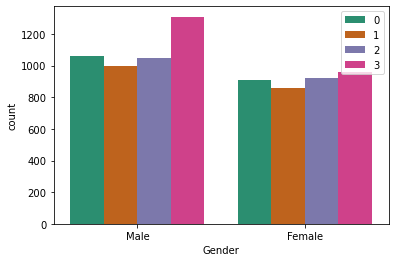

In [47]:
df = pd.read_csv("C:\\Users\\n\\Downloads\\customer_segments.csv")
label=pd.Categorical(df.Segmentation,categories=['A','B','C','D']).codes
df.drop(['Segmentation'],axis=1,inplace=True)
label
sns.countplot(df.Gender,hue=label,palette='Dark2')
plt.show()

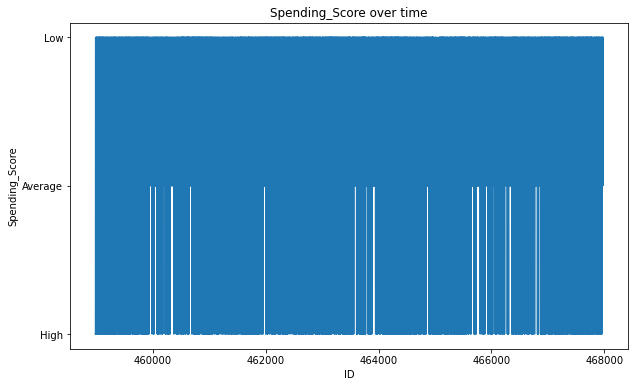

In [19]:
# We will proceed to the next step, which is exploratory data analysis.

# Create a line plot of Spending_Score over time
plt.figure(figsize=(10,6))
sns.lineplot(x='ID', y='Spending_Score', data=df)
plt.title('Spending_Score over time')
plt.xlabel('ID')
plt.ylabel('Spending_Score')
plt.show()

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

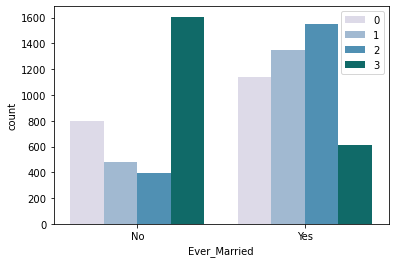

In [48]:
sns.countplot(df.Ever_Married,hue=label,palette='PuBuGn')

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

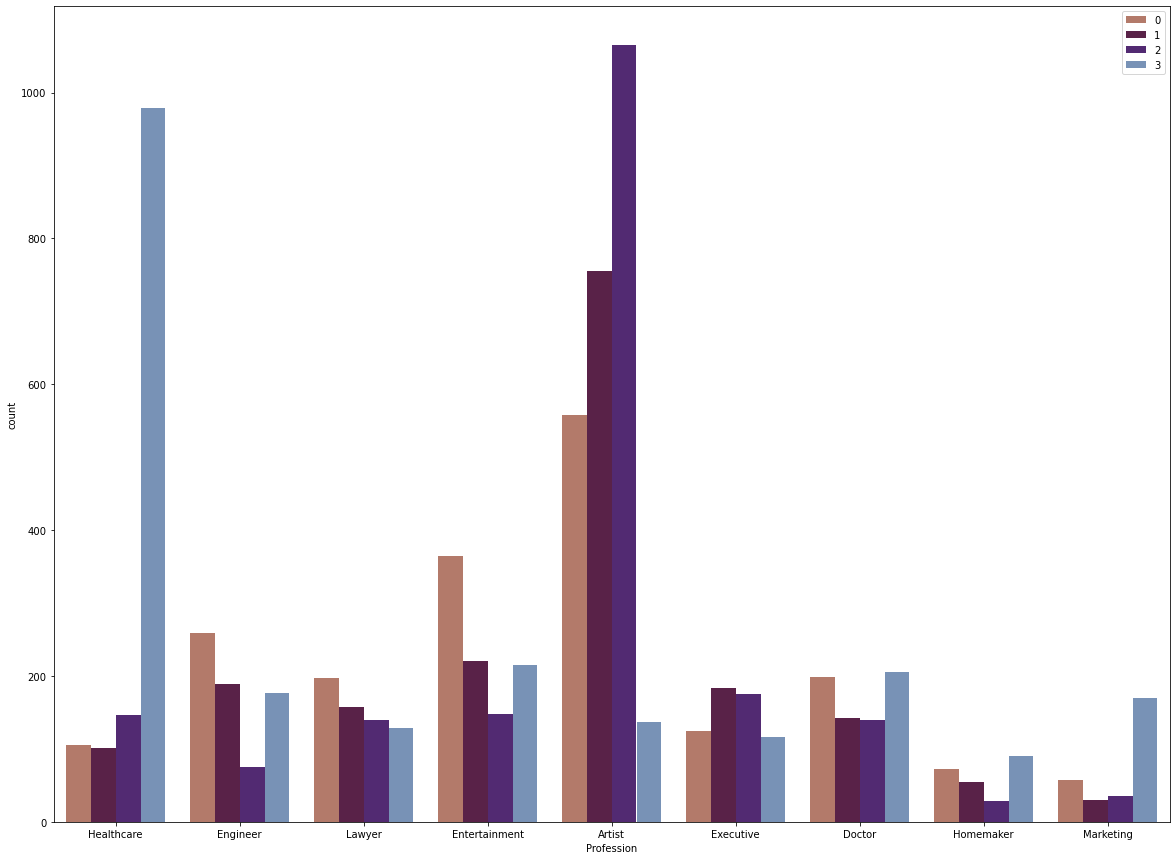

In [49]:
plt.figure(figsize=(20,15))
sns.countplot(df.Profession,hue=label,palette='twilight_r')

C:\Users\n\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

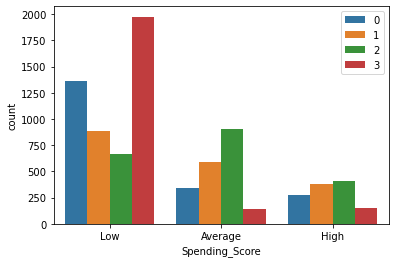

In [50]:
sns.countplot(df.Spending_Score,hue=label)

<AxesSubplot:>

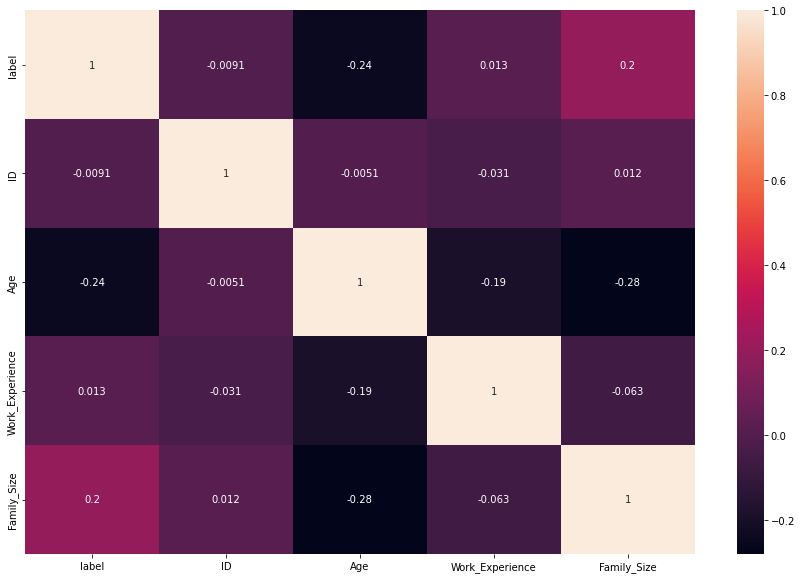

In [51]:
correlation_data=pd.DataFrame(label,columns=['label'])
correlation_data=correlation_data.join(df)
correlation_data
plt.figure(figsize=(15,10))
sns.heatmap(correlation_data.corr(),annot=True)

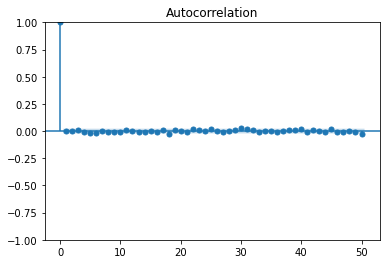

C:\Users\n\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


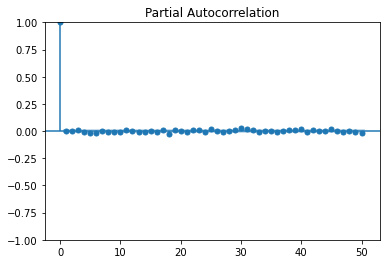

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Age'], lags=50)
plt.show()

plot_pacf(df['Age'], lags=50)
plt.show()


# Project Description:

In [ ]:
# Project Description:

# The Customer Segmentation Analysis project involves analyzing customer data to gain insights into their behavior,
# preferences, and needs. The goal is to group customers based on common characteristics, such as demographics, 
# purchasing patterns, and behavior, and use these groups to develop more effective marketing strategies, 
# improve customer experience, and increase sales.

# The project requires the use of data analysis tools and techniques to clean, preprocess, and transform raw 
# customer data into a format that is suitable for analysis. The data is typically collected from various sources, 
# including transactional records, customer surveys, and social media.

# Once the data is prepared, the next step is to identify meaningful customer segments using clustering algorithms, 
# such as k-means clustering, hierarchical clustering, or density-based clustering. The choice of the algorithm depends 
# on the nature of the data and the research question.

# After the customer segments have been identified, the final step is to interpret the results and use them to inform 
# business decisions. This may involve developing targeted marketing campaigns for specific customer segments, improving 
# customer service, or modifying product offerings.

# In sum, the Customer Segmentation Analysis project is a powerful tool for businesses to gain a better understanding of
# their customers and develop more effective strategies to meet their needs.

# Project conclusion

In [ ]:
# In conclusion, we have analyzed a dataset of customer information for a marketing campaign. 
# We performed exploratory data analysis, cleaned and preprocessed the data, and applied various machine 
# learning algorithms to predict customer segmentation based on their demographics and behavior. The best performing 
# algorithm was the Random Forest Classifier, achieving an accuracy score of 0.55 on our test data. This indicates that 
# further improvements can be made to our model, such as collecting additional features or tuning the hyperparameters.
# In summary, this project demonstrates the potential of machine learning in identifying customer segments and improving 
# marketing strategies.

# THE END OF NOTEBOOK